In [1]:
import os
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")

In [2]:
import os
import networkx as nx
import numpy as np
import tools.graph_processing as gp
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from matplotlib.pyplot import figure

In [3]:
def mean_edge_len(G):
    
    all_geo = [z['geodesic_distance'] for x, y, z in list(G.edges.data())]

    return all_geo

In [54]:
path_to_graphs = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/ten_thous/0/noise_1200,outliers_16/graphs/'

In [ ]:
path_to_real_graphs = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs'

In [55]:
list_graphs_simu = gp.load_graphs_in_list(path_to_graphs)

In [ ]:
list_graphs_real = gp.load_graphs_in_list(path_to_real_graphs)

In [50]:
len(list_graphs)

138

In [ ]:
min_geo_real = []
for graphs in list_graphs:
    z = mean_edge_len(graphs)
    min_geo_real.append(min(z))

In [ ]:
min(min_geo_real)

In [ ]:
figure(figsize=(11,7))
plt.hist(min_geo_real, density=True, bins=120)  # density=False would make counts
plt.ylabel('density')
plt.xlabel('min_geo_len');

In [11]:
min_geo = []
sorted_graphs = []
for graphs in list_graphs:
    z = mean_edge_len(graphs)
    
    if min(z) > 9.5:
        sorted_graphs.append(graphs)
        
    min_geo.append(min(z))

In [12]:
len(sorted_graphs)

210

In [34]:
min_geo_sorted_graphs = []

for g in sorted_graphs:
    min_geo_sorted_graphs.append(min(mean_edge_len(g)))

zipped_lists = zip(min_geo_sorted_graphs, sorted_graphs)
sorted_zipped_lists = sorted(zipped_lists)
sorted_list1 = [element for _, element in sorted_zipped_lists]
#print(sorted_list1)

In [45]:
sorted_zipped_lists[:5]

[(9.501703129025026, <networkx.classes.graph.Graph at 0x7fc730bbda60>),
 (9.520373011271706, <networkx.classes.graph.Graph at 0x7fc73be79c40>),
 (9.523163893246425, <networkx.classes.graph.Graph at 0x7fc70bdcdb20>),
 (9.525051452964286, <networkx.classes.graph.Graph at 0x7fc7355f9940>),
 (9.532618380902015, <networkx.classes.graph.Graph at 0x7fc72a992b20>)]

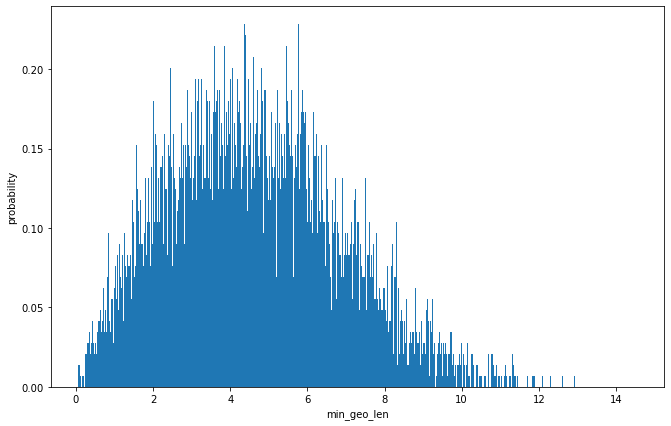

In [14]:
figure(figsize=(11,7))
plt.hist(min_geo, density=True, bins=1000)  # density=False would make counts
plt.ylabel('probability')
plt.xlabel('min_geo_len');

In [ ]:
#del min_geo

In [56]:
import os
import networkx as nx
import numpy as np
import tools.graph_processing as gp
import tools.plotly_extension as tp
import plotly.graph_objs as go

def mean_edge_len(G):
    
    all_geo = [z['geodesic_distance'] for x,y,z in list(G.edges.data())]
    mean_geo = np.array(all_geo).mean()
    std = np.std(all_geo)
    
    return all_geo


if __name__ == "__main__":
    geo_values = 200
    # real data
    path_to_graphs = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/OASIS_full_batch/modified_graphs'

    # Get the meshes
    list_graphs = gp.load_graphs_in_list(path_to_graphs)
    geo_list = list()
    fig_labels = list()

    for ind, graph in enumerate(list_graphs):
        fig_labels.append('graph_'+str(ind))
        gp.remove_dummy_nodes(graph)
        print(len(graph.nodes))
        graph.remove_edges_from(nx.selfloop_edges(graph))
        geo_list.append(mean_edge_len(graph))
    # compute the histos
    geo_histo = np.zeros((len(geo_list), geo_values))
    for i_d, dist in enumerate(geo_list):
        count = np.bincount(dist)
        print("len bincount",len(count))
        for i,c in enumerate(count):
            print(i,c)
            geo_histo[i_d, i] += c
        geo_histo[i_d, :] = geo_histo[i_d, :]/np.sum(count)
    # lines for the plot
    x = list(range(geo_values))
    y = np.mean(geo_histo, 0)
    y_upper = y + np.std(geo_histo, 0)
    y_lower = y - np.std(geo_histo, 0)
    # error plot from real data
    fig_c = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='geo real data', color='rgb(20, 20, 200)')

    
    
    list_graphs = list_graphs_simu
    geo_list = list()
    fig_labels = list()
    for ind, graph in enumerate(list_graphs):
        fig_labels.append('simu_graph_'+str(ind))
        gp.remove_dummy_nodes(graph)
        print(len(graph.nodes))
        graph.remove_edges_from(nx.selfloop_edges(graph))
        geo_list.append(mean_edge_len(graph))
    # compute the histos
    geo_histo = np.zeros((len(geo_list), geo_values))
    for i_d, dist in enumerate(geo_list):
        count = np.bincount(dist)
        for i,c in enumerate(count):
            geo_histo[i_d, i] += c
        geo_histo[i_d, :] = geo_histo[i_d, :]/np.sum(count)
    # lines for the plot
    y = np.mean(geo_histo, 0)
    y_upper = y + np.std(geo_histo, 0)
    y_lower = y - np.std(geo_histo, 0)
    # error plot from real data
    fig_c2 = tp.error_plot(x=x, y=y, y_lower=y_lower, y_upper=y_upper, line_label='geo simus', color='rgb(200, 20, 20)')
    fig_c.extend(fig_c2)
    fig = go.Figure(fig_c)


    fig.update_layout(
        yaxis_title='proportion',
        title='distribution of geodesic_distance noise_1000,outliers_16',
        hovermode="x"
    )
    #fig.show(renderer="browser")
    fig.write_html('first_figure.html', auto_open=True)



83
91
89
85
87
92
94
80
89
85
92
89
88
93
82
88
89
89
95
94
91
82
93
89
101
88
94
87
92
86
81
87
91
92
86
89
79
84
88
89
86
101
88
81
86
91
94
86
92
89
81
95
91
91
82
91
94
85
83
90
95
85
89
87
86
86
81
91
95
90
85
83
89
83
93
90
91
86
90
86
91
85
80
83
84
79
83
94
96
89
93
87
87
85
92
89
92
86
84
87
96
89
96
88
97
86
88
83
78
81
91
83
84
94
80
92
94
86
89
97
91
96
83
89
89
93
94
85
91
83
77
89
87
86
len bincount 126
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 2
15 0
16 0
17 2
18 2
19 1
20 1
21 6
22 4
23 3
24 6
25 5
26 5
27 5
28 5
29 5
30 4
31 8
32 3
33 5
34 7
35 2
36 5
37 4
38 9
39 8
40 10
41 3
42 2
43 2
44 6
45 7
46 4
47 2
48 6
49 4
50 3
51 6
52 3
53 1
54 3
55 1
56 4
57 4
58 3
59 4
60 4
61 3
62 2
63 5
64 2
65 4
66 1
67 1
68 1
69 0
70 1
71 2
72 1
73 0
74 3
75 1
76 2
77 2
78 0
79 1
80 1
81 0
82 1
83 0
84 0
85 0
86 0
87 0
88 2
89 1
90 1
91 0
92 0
93 0
94 0
95 1
96 0
97 0
98 0
99 1
100 0
101 1
102 1
103 0
104 0
105 0
106 0
107 0
108 0
109 1
110 0
111 0
112 0
113 0
114 

85 1
86 1
87 1
88 2
89 1
90 0
91 0
92 0
93 2
94 0
95 1
96 0
97 0
98 0
99 0
100 1
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 1
110 1
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 1
120 0
121 0
122 0
123 0
124 1
125 1
126 0
127 1
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 1
len bincount 102
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 1
15 0
16 3
17 1
18 1
19 1
20 2
21 1
22 4
23 6
24 3
25 5
26 4
27 5
28 7
29 8
30 2
31 8
32 5
33 9
34 5
35 4
36 5
37 9
38 4
39 3
40 8
41 6
42 6
43 2
44 3
45 5
46 7
47 8
48 6
49 6
50 6
51 3
52 4
53 3
54 2
55 1
56 1
57 5
58 3
59 3
60 8
61 1
62 0
63 3
64 1
65 0
66 2
67 1
68 6
69 1
70 2
71 2
72 2
73 1
74 0
75 1
76 0
77 1
78 0
79 2
80 0
81 1
82 0
83 1
84 0
85 0
86 1
87 3
88 0
89 0
90 1
91 0
92 1
93 0
94 2
95 0
96 2
97 0
98 1
99 1
100 0
101 1
len bincount 118
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 1


103 0
104 0
105 0
106 0
107 0
108 1
109 0
110 0
111 0
112 0
113 1
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 1
len bincount 144
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 1
12 0
13 0
14 0
15 1
16 2
17 1
18 0
19 2
20 4
21 2
22 4
23 3
24 6
25 6
26 6
27 4
28 5
29 7
30 2
31 9
32 9
33 5
34 10
35 6
36 4
37 5
38 6
39 9
40 12
41 6
42 3
43 4
44 6
45 4
46 7
47 3
48 7
49 10
50 4
51 4
52 0
53 3
54 2
55 4
56 7
57 3
58 0
59 2
60 0
61 1
62 0
63 2
64 1
65 2
66 3
67 1
68 3
69 1
70 2
71 1
72 1
73 1
74 0
75 0
76 3
77 0
78 0
79 0
80 2
81 1
82 0
83 2
84 1
85 1
86 0
87 2
88 1
89 0
90 2
91 1
92 0
93 0
94 0
95 3
96 0
97 0
98 1
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 1
108 0
109 1
110 1
111 0
112 1
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 1
128 0
129 0
130 0
131 1
132 0
133 0
134 1
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 1
len bincount 134
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7

9 0
10 0
11 0
12 0
13 1
14 2
15 0
16 1
17 1
18 2
19 0
20 1
21 4
22 3
23 4
24 4
25 5
26 5
27 3
28 7
29 6
30 4
31 4
32 5
33 4
34 12
35 5
36 6
37 11
38 3
39 5
40 7
41 6
42 9
43 1
44 6
45 8
46 5
47 6
48 3
49 4
50 5
51 5
52 3
53 4
54 4
55 3
56 1
57 2
58 5
59 5
60 2
61 1
62 3
63 2
64 2
65 4
66 1
67 1
68 0
69 2
70 2
71 0
72 1
73 2
74 1
75 2
76 1
77 1
78 1
79 0
80 1
81 0
82 1
83 2
84 1
85 1
86 1
87 1
88 2
89 0
90 0
91 1
92 1
93 0
94 0
95 0
96 0
97 0
98 1
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 1
119 0
120 0
121 2
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 1
len bincount 107
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 1
13 1
14 0
15 0
16 0
17 4
18 0
19 2
20 7
21 5
22 8
23 10
24 6
25 11
26 6
27 9
28 9
29 4
30 4
31 6
32 9
33 8
34 7
35 9
36 10
37 5
38 3
39 

80 1
81 1
82 1
83 0
84 2
85 1
86 0
87 1
88 0
89 2
90 0
91 1
92 0
93 0
94 0
95 0
96 1
97 0
98 1
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 1
107 1
108 0
109 1
len bincount 148
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 1
16 0
17 5
18 2
19 4
20 3
21 3
22 3
23 3
24 5
25 3
26 3
27 8
28 10
29 3
30 8
31 7
32 4
33 10
34 4
35 6
36 9
37 2
38 5
39 2
40 8
41 6
42 6
43 3
44 8
45 8
46 3
47 6
48 3
49 2
50 3
51 8
52 6
53 8
54 4
55 4
56 5
57 4
58 4
59 1
60 1
61 1
62 1
63 3
64 3
65 0
66 1
67 1
68 4
69 4
70 2
71 1
72 1
73 2
74 0
75 0
76 1
77 0
78 3
79 1
80 1
81 0
82 0
83 2
84 0
85 0
86 0
87 1
88 0
89 0
90 2
91 1
92 0
93 0
94 2
95 0
96 0
97 1
98 0
99 0
100 0
101 0
102 0
103 0
104 0
105 1
106 0
107 0
108 0
109 0
110 0
111 1
112 1
113 0
114 0
115 0
116 0
117 1
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 1
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 1
len bincount 141
0 0
1 0
2 0
3 0
4 0
5 0
6 

6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 1
14 1
15 0
16 1
17 0
18 0
19 6
20 0
21 3
22 2
23 5
24 8
25 2
26 6
27 5
28 7
29 5
30 5
31 6
32 5
33 12
34 7
35 8
36 6
37 5
38 4
39 5
40 6
41 4
42 5
43 6
44 6
45 7
46 7
47 5
48 3
49 5
50 6
51 3
52 2
53 3
54 1
55 4
56 1
57 2
58 3
59 3
60 5
61 1
62 0
63 1
64 4
65 2
66 2
67 3
68 0
69 1
70 2
71 1
72 0
73 1
74 4
75 1
76 1
77 0
78 1
79 2
80 2
81 1
82 1
83 1
84 0
85 0
86 0
87 1
88 0
89 0
90 1
91 0
92 2
93 0
94 0
95 0
96 0
97 0
98 0
99 0
100 0
101 1
102 0
103 1
104 1
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 1
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 0
155 1
len bincount 152
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 1
16 0
17 0
18 3
19 3
20 3
21 5
22 7
23 4
24 2
25 5
26 5
27 4
28 7
29 6
30 6
31 5
32 7
33 0
34 3
35 6
36 5
37 3


60 3
61 2
62 2
63 2
64 2
65 2
66 2
67 7
68 1
69 1
70 1
71 1
72 0
73 3
74 2
75 2
76 2
77 1
78 2
79 0
80 1
81 0
82 0
83 2
84 1
85 1
86 0
87 0
88 0
89 1
90 1
91 0
92 0
93 0
94 1
95 0
96 1
97 1
98 2
99 0
100 0
101 0
102 0
103 0
104 1
105 1
106 0
107 1
108 0
109 0
110 0
111 0
112 0
113 1
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 1
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 1
len bincount 112
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 1
15 1
16 0
17 0
18 0
19 4
20 3
21 2
22 4
23 6
24 4
25 5
26 7
27 6
28 6
29 8
30 2
31 7
32 3
33 7
34 10
35 6
36 7
37 12
38 4
39 3
40 7
41 7
42 3
43 5
44 10
45 3
46 0
47 4
48 4
49 5
50 3
51 7
52 5
53 1
54 2
55 4
56 3
57 5
58 2
59 2
60 6
61 1
62 2
63 3
64 3
65 7
66 0
67 1
68 1
69 1
70 2
71 2
72 1
73 2
74 1
75 1
76 0
77 1
78 2
79 1
80 2
81 1
82 0
83 0
84 0
85 1
86 2
87 2
88 1
89 0
90 1
91 0
92 1
93 0
94 0
95 1
96 0
97 1
98 0
99 0
100 0
101 2
102 0
103 0
104 0
105 0
106 1
107 0
10

102 0
103 1
104 0
105 0
106 0
107 0
108 0
109 1
110 0
111 0
112 0
113 0
114 1
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 1
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 1
len bincount 117
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 3
17 1
18 2
19 0
20 3
21 2
22 8
23 6
24 9
25 3
26 3
27 6
28 1
29 2
30 5
31 9
32 7
33 5
34 9
35 2
36 5
37 7
38 3
39 5
40 7
41 10
42 10
43 7
44 5
45 6
46 6
47 7
48 2
49 6
50 3
51 7
52 2
53 5
54 3
55 4
56 3
57 6
58 3
59 4
60 4
61 4
62 2
63 1
64 0
65 0
66 1
67 3
68 2
69 0
70 1
71 0
72 1
73 1
74 1
75 2
76 2
77 0
78 1
79 0
80 1
81 0
82 0
83 2
84 1
85 0
86 0
87 2
88 1
89 0
90 1
91 0
92 2
93 0
94 1
95 0
96 0
97 0
98 0
99 0
100 0
101 1
102 0
103 1
104 0
105 0
106 0
107 0
108 0
109 0
110 1
111 0
112 0
113 0
114 0
115 0
116 1
len bincount 116
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 1
14 1
15 1
16 1
17 3
18 2
19 3
20 6
21 1
22 2
23 1
24 9
25 4
26 7
27 7
28 9
29 6
30 4
31 5
32 10
33 5
34 6
35 2
36 4
37 5
38 8
39 10


87 1
88 0
89 0
90 0
91 0
92 2
93 1
94 0
95 0
96 0
97 1
98 0
99 0
100 0
101 0
102 0
103 0
104 1
105 0
106 0
107 2
108 0
109 0
110 1
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 0
119 0
120 0
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 1
len bincount 110
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 1
16 0
17 0
18 4
19 1
20 3
21 1
22 4
23 1
24 5
25 7
26 6
27 5
28 4
29 6
30 2
31 6
32 6
33 11
34 6
35 4
36 4
37 4
38 4
39 7
40 9
41 2
42 7
43 3
44 9
45 7
46 5
47 5
48 3
49 7
50 3
51 4
52 2
53 7
54 4
55 5
56 4
57 2
58 0
59 1
60 4
61 1
62 3
63 2
64 3
65 1
66 1
67 4
68 1
69 5
70 1
71 1
72 0
73 2
74 0
75 1
76 2
77 3
78 1
79 0
80 0
81 0
82 2
83 2
84 1
85 1
86 1
87 0
88 0
89 1
90 1
91 1
92 0
93 0
94 2
95 0
96 0
97 0
98 0
99 0
100 1
101 1
102 0
103 0
104 0
105 0
106 0
107 1
108 0
109 1
len bincount 110
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 1
14 0
15 

59 4
60 1
61 3
62 2
63 1
64 4
65 0
66 3
67 1
68 1
69 2
70 1
71 1
72 2
73 2
74 1
75 1
76 3
77 0
78 0
79 1
80 1
81 1
82 0
83 1
84 1
85 0
86 0
87 3
88 0
89 1
90 2
91 1
92 0
93 0
94 0
95 1
96 0
97 0
98 2
99 0
100 0
101 0
102 0
103 0
104 0
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 0
115 0
116 1
117 0
118 1
119 0
120 1
121 0
122 0
123 0
124 0
125 0
126 0
127 0
128 0
129 0
130 0
131 0
132 0
133 1
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 0
147 0
148 0
149 0
150 0
151 0
152 0
153 0
154 1
len bincount 158
0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 1
14 0
15 2
16 0
17 0
18 1
19 0
20 3
21 3
22 6
23 6
24 5
25 8
26 5
27 5
28 6
29 6
30 11
31 4
32 3
33 4
34 5
35 4
36 9
37 11
38 9
39 4
40 5
41 5
42 10
43 3
44 7
45 5
46 3
47 4
48 6
49 5
50 6
51 4
52 2
53 3
54 5
55 3
56 3
57 7
58 2
59 1
60 0
61 2
62 0
63 2
64 2
65 1
66 0
67 2
68 2
69 2
70 0
71 4
72 1
73 2
74 1
75 3
76 0
77 0
78 0
79 0
80 1
81 1
82 0
83 1
84 2
85 1
86 0
87 1
88 0
89 0
90 0


In [ ]:
# hist_data = [mean_edge_len(g) for g in sorted_graphs]
    
# group_labels = [str(i) for i in range(14)]
    
# fig = ff.create_distplot(hist_data, group_labels, show_hist=False)

# fig.write_html('first_figure.html', auto_open=True)